In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-15T03:22:24.677459+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
teeplot: 1.4.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/4 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9311904907226562e-05}
enter log_context_duration for _do_sequences


 25%|██▌       | 1/4 [00:05<00:17,  5.89s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 5.595309019088745}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.11304140090942383}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.018350601196289062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.15766143798828125}
enter log_context_duration for extract


 50%|█████     | 2/4 [00:06<00:05,  2.60s/it]

exit log_context_duration for extract
!!! {"extract": 0.05260276794433594}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006139278411865234}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
enter log_context_duration for _do_sequences


 75%|███████▌  | 3/4 [00:06<00:01,  1.74s/it]

exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.39864492416381836}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.1304178237915039}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.01481008529663086}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}


100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


enter log_context_duration for _do_sequences
exit log_context_duration for _do_sequences
!!! {"_do_sequences": 0.03568267822265625}
enter log_context_duration for extract
exit log_context_duration for extract
!!! {"extract": 0.011581659317016602}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0016274452209472656}
exit log_context_duration for generate_dummy_sequences_simple
!!! {"generate_dummy_sequences_simple": 8.387258052825928}
enter log_context_duration for extract variant
exit log_context_duration for extract variant
!!! {"extract variant": 0.18011903762817383}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.28638625144958496}
Rows: 5
Columns: 3
$ id       <i64> 136279, 136374, 136465, 138720, 138914
$ sequence <str> "'ATCACAGTTTTATACCTTCCCAGGTAACAAACCAACCCACTTTCGGTTTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCA

 14%|█▍        | 1/7 [00:00<00:00,  6.94it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.001756906509399414}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.07279300689697266}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.06307530403137207}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0017940998077392578}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.053130149841308594}
enter log_context_duration for res.collect


 71%|███████▏  | 5/7 [00:00<00:00, 12.85it/s]

exit log_context_duration for res.collect
!!! {"res.collect": 0.039628028869628906}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0017771720886230469}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03961181640625}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.016196250915527344}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0018341541290283203}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033934593200683594}
enter log_context_duration for res.collect
exit log_context_duration for res.coll

100%|██████████| 7/7 [00:00<00:00, 12.42it/s]


exit log_context_duration for mismatches
!!! {"mismatches": 0.05857062339782715}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.03573107719421387}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0020782947540283203}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.1457672119140625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.024732589721679688}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.009932279586791992}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.8402013778686523}
sequence_diff
{"0": "'",    35140
{"0": "'"}     4729
Name: count, dtype: int64
Rows: 5
Columns: 19
$ source                    <i64> 107456, 107456, 10699, 10699, 10699
$ target                    <i64> 107456,

In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 42
$ source                          <u32> 107456, 107456, 10699, 10699, 10699
$ target                          <u32> 107456, 107456, 10699, 10699, 82726
$ date                            <u16> 0, 0, 0, 0, 3
$ layer                           <cat> importation, importation, importation, importation, w
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 1, 2, 3
$ origin_time                     <u16> 0, 0, 0, 0, 3
$ ancestor_list                   <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ is_root                        <bool> False, True, False, False, False
$ is_oldest_root                 <bool> True, True, False, False, False
$ is_leaf                        <bool> False, False, False, False, False
$ node_depth                       <u8>

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'",    35140
{"0": "'"}     4729
Name: count, dtype: int64
Rows: 5
Columns: 43
$ source                          <u32> 107456, 107456, 10699, 10699, 10699
$ target                          <u32> 107456, 107456, 10699, 10699, 82726
$ date                            <u16> 0, 0, 0, 0, 3
$ layer                           <cat> importation, importation, importation, importation, w
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 1, 2, 3
$ origin_time                     <u16> 0, 0, 0, 0, 3
$ ancestor_list                   <str> '[none]', '[0]', '[1]', '[2]', '[3]'
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ is_root                        <bool> False, True, False, False, False
$ is_oldest_root                 <bool> True, True, False, False, False
$ is_leaf                        

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: invalid value encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exit log_context_duration for alifestd_mark_clade_subtended_duration_ratio_sister_asexual
!!! {"alifestd_mark_clade_subtended_duration_ratio_sister_asexual": 0.18892168998718262}
enter log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual



100%|██████████| 7551/7551 [00:25<00:00, 293.54it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 26.459344148635864}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 7551/7551 [00:05<00:00, 1283.31it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 11.05559515953064}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.07508134841918945}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 68.44066858291626}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.02146124839782715}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0037393569946289062}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.006561279296875}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0011494159698486328}
ancestral_sequenc


100%|██████████| 1171/1171 [00:00<00:00, 227575.29it/s]

process mutations:   0%|          | 1/1171 [00:00<04:04,  4.78it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   1%|          | 8/1171 [00:19<49:43,  2.56s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.9s



process mutations:   4%|▍         | 48/1171 [01:17<29:17,  1.57s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:   8%|▊         | 88/1171 [02:14<26:56,  1.49s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.3min



process mutations:  11%|█         | 128/1171 [03:11<25:31,  1.47s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.2min



process mutations:  14%|█▍        | 168/1171 [04:10<24:34,  1.47s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.2min



process mutations:  18%|█▊        | 208/1171 [05:08<23:24,  1.46s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  5.2min



process mutations:  21%|██        | 248/1171 [06:04<22:11,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  6.2min



process mutations:  25%|██▍       | 288/1171 [07:02<21:12,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  7.1min



process mutations:  28%|██▊       | 328/1171 [07:59<20:14,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  8.1min



process mutations:  31%|███▏      | 368/1171 [08:56<19:13,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 358 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:  9.0min



process mutations:  35%|███▍      | 408/1171 [09:53<18:10,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 398 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed: 10.0min



process mutations:  38%|███▊      | 448/1171 [10:50<17:11,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 428 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 448 tasks      | elapsed: 11.0min



process mutations:  42%|████▏     | 488/1171 [11:48<16:20,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 458 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 468 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 478 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed: 12.0min



process mutations:  45%|████▌     | 528/1171 [12:47<15:30,  1.45s/it]

[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 518 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed: 12.9min



process mutations:  49%|████▊     | 568/1171 [13:43<14:21,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 558 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 568 tasks      | elapsed: 13.9min



process mutations:  52%|█████▏    | 608/1171 [14:38<13:18,  1.42s/it]

[Parallel(n_jobs=-1)]: Done 578 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 588 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 598 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed: 14.9min



process mutations:  55%|█████▌    | 648/1171 [15:35<12:21,  1.42s/it]

[Parallel(n_jobs=-1)]: Done 618 tasks      | elapsed: 15.6min
[Parallel(n_jobs=-1)]: Done 628 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 638 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed: 15.8min



process mutations:  59%|█████▉    | 688/1171 [16:32<11:25,  1.42s/it]

[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed: 16.8min



process mutations:  62%|██████▏   | 728/1171 [17:30<10:33,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 698 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 708 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 718 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 728 tasks      | elapsed: 17.8min



process mutations:  66%|██████▌   | 768/1171 [18:29<09:40,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 738 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 758 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed: 18.8min



process mutations:  69%|██████▉   | 808/1171 [19:28<08:46,  1.45s/it]

[Parallel(n_jobs=-1)]: Done 778 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed: 19.8min



process mutations:  72%|███████▏  | 848/1171 [20:24<07:44,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 838 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed: 20.7min



process mutations:  76%|███████▌  | 888/1171 [21:20<06:44,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 858 tasks      | elapsed: 21.3min
[Parallel(n_jobs=-1)]: Done 868 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed: 21.6min



process mutations:  79%|███████▉  | 928/1171 [22:17<05:45,  1.42s/it]

[Parallel(n_jobs=-1)]: Done 898 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 908 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed: 22.6min



process mutations:  83%|████████▎ | 968/1171 [23:14<04:49,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 958 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed: 23.5min



process mutations:  86%|████████▌ | 1008/1171 [24:13<03:54,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 978 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 988 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 998 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed: 24.5min



process mutations:  89%|████████▉ | 1048/1171 [25:12<02:58,  1.45s/it]

[Parallel(n_jobs=-1)]: Done 1018 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 1028 tasks      | elapsed: 25.4min
[Parallel(n_jobs=-1)]: Done 1038 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed: 25.5min



process mutations:  93%|█████████▎| 1088/1171 [26:09<01:59,  1.44s/it]

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed: 26.2min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed: 26.3min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed: 26.4min
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 26.5min



process mutations:  96%|█████████▋| 1128/1171 [27:04<01:01,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 1098 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 1108 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 1118 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed: 27.4min



process mutations: 100%|██████████| 1171/1171 [27:59<00:00,  1.43s/it]

[Parallel(n_jobs=-1)]: Done 1138 tasks      | elapsed: 28.0min


[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed: 28.1min
[Parallel(n_jobs=-1)]: Done 1140 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 1150 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 1171 out of 1171 | elapsed: 28.3min finished


process replicate: 100%|██████████| 1/1 [29:37<00:00, 1777.13s/it]


enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.24074244499206543}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 118
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.30128467082977295, 0.30128467082977295, 0.30128467082977295, 0.30128467082977295, 0.30128467082977295
$ mut_nobs                       <u16> 39869, 39869, 39869, 39869, 39869
$ mut_uuid                       <str> 'bdd96b13-e3be-83e7-843f-c06185249bcd', 'bdd96b13-e3be-83e7-843f-c06185249bcd', 'bdd96b13-e3be-83e7-843f-c06185
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 14258, 14590, 14221, 14584, 12665
$ phyo_df_screened_len           <u16> 844, 512, 881, 518, 2437
$ tb_stat                

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


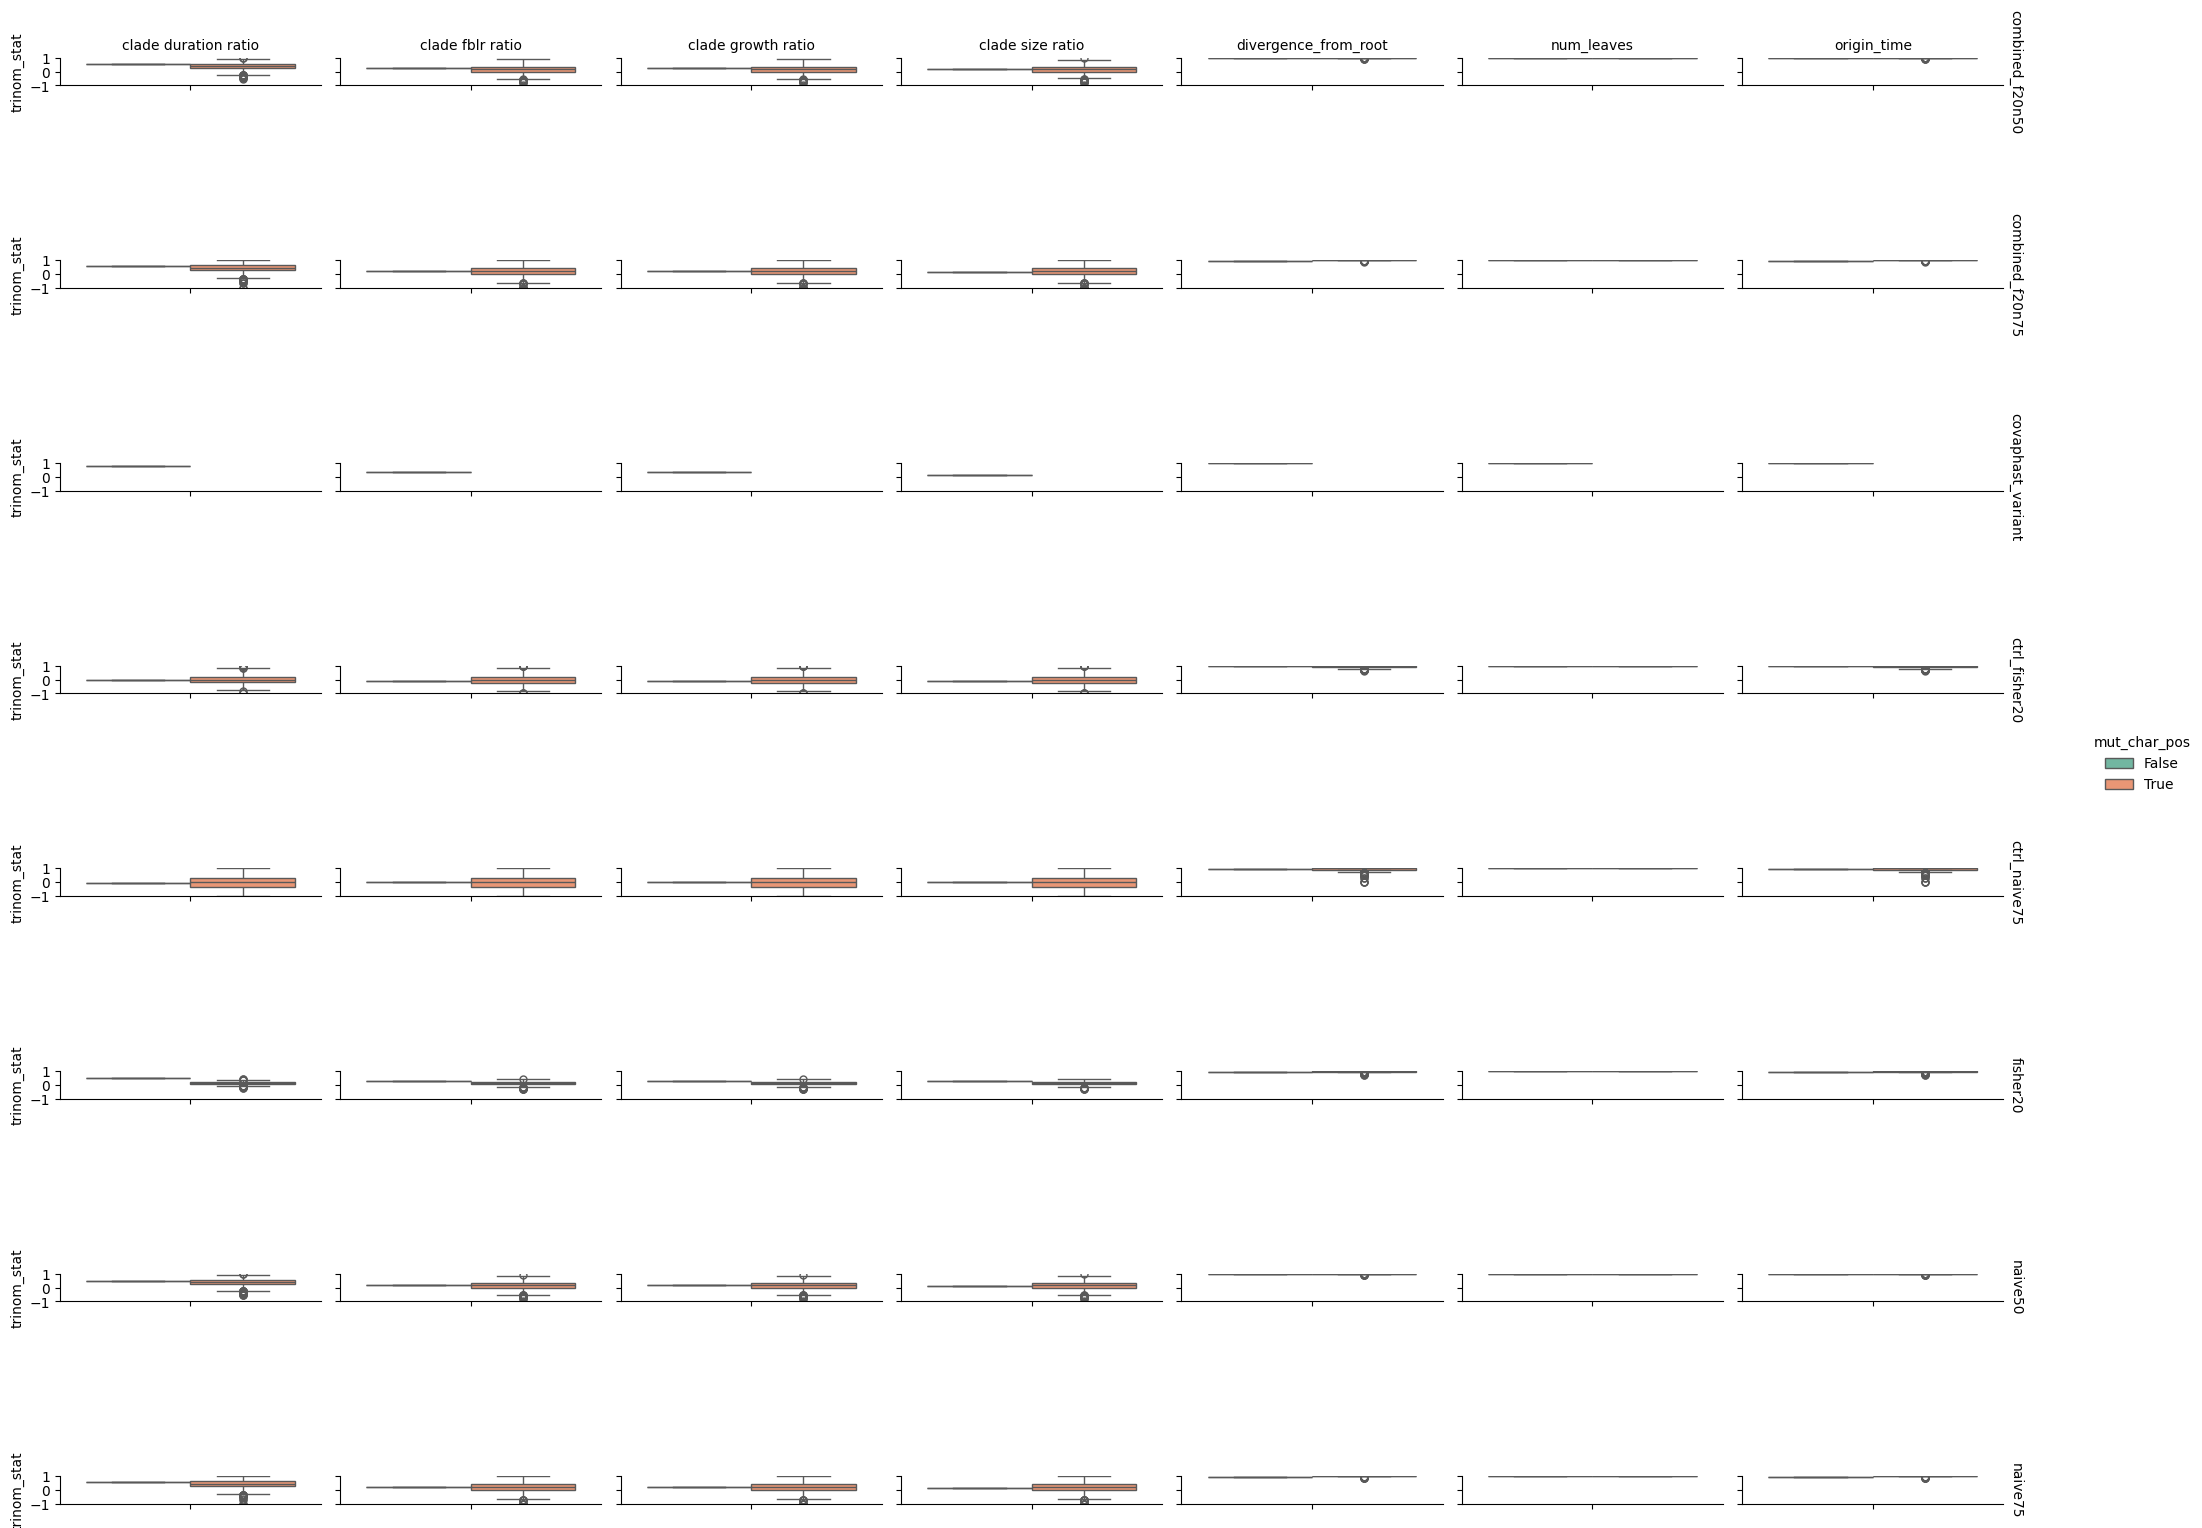

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


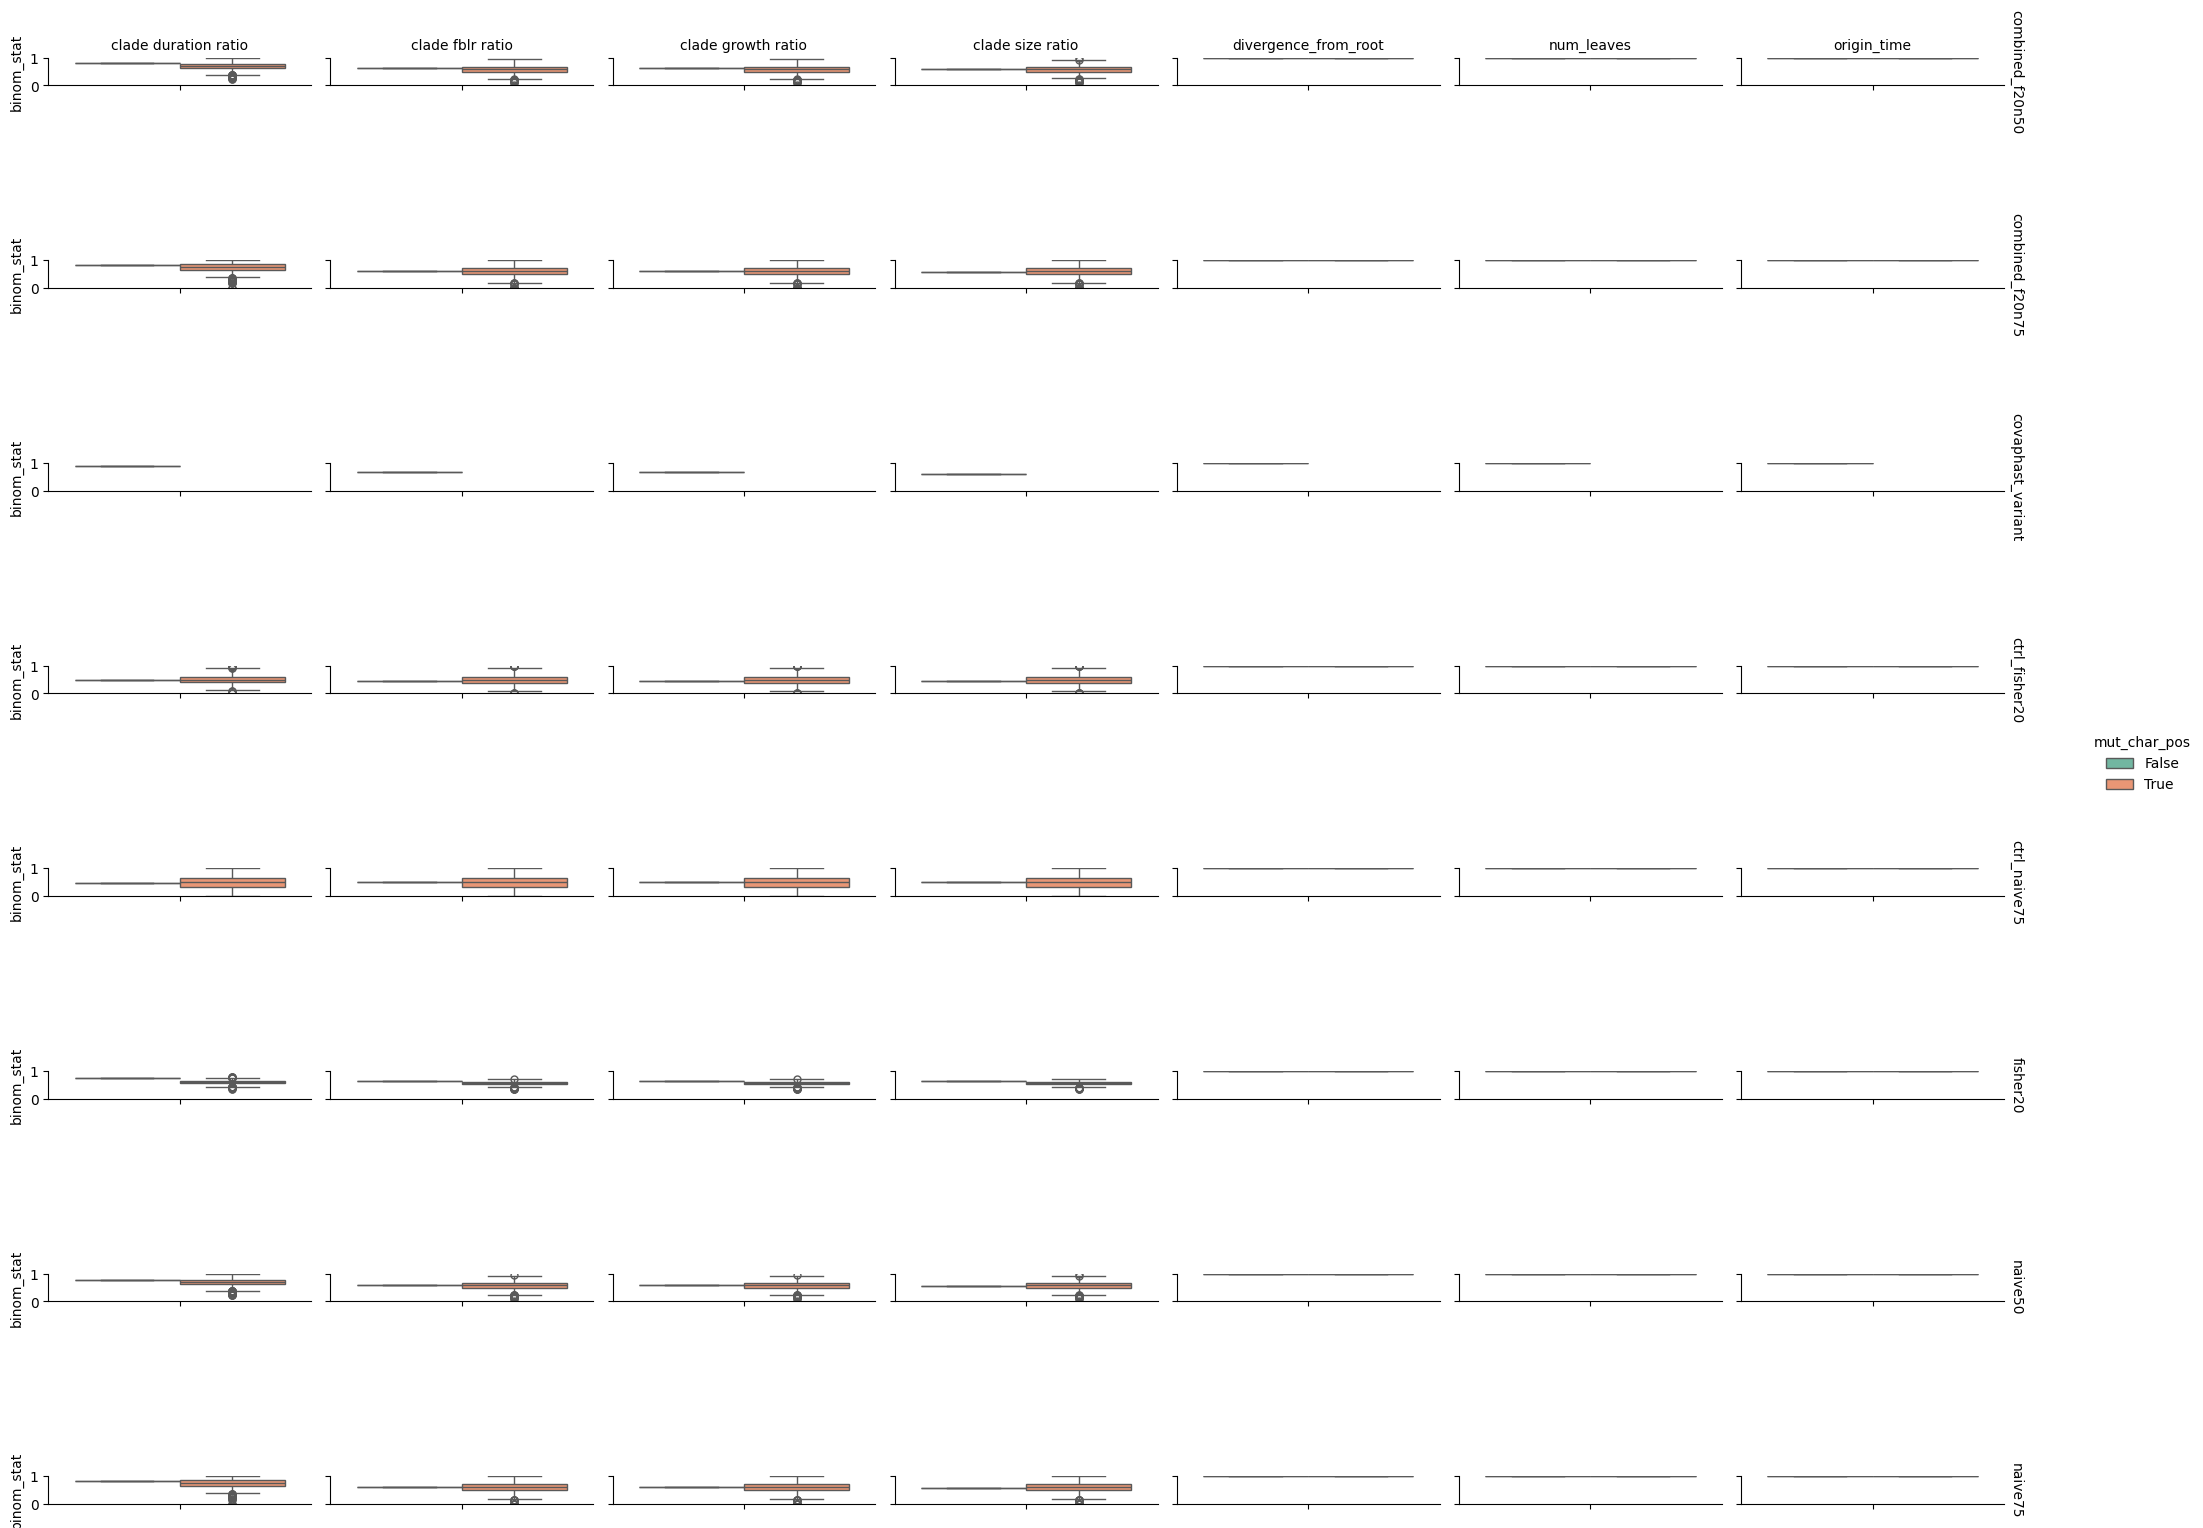

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


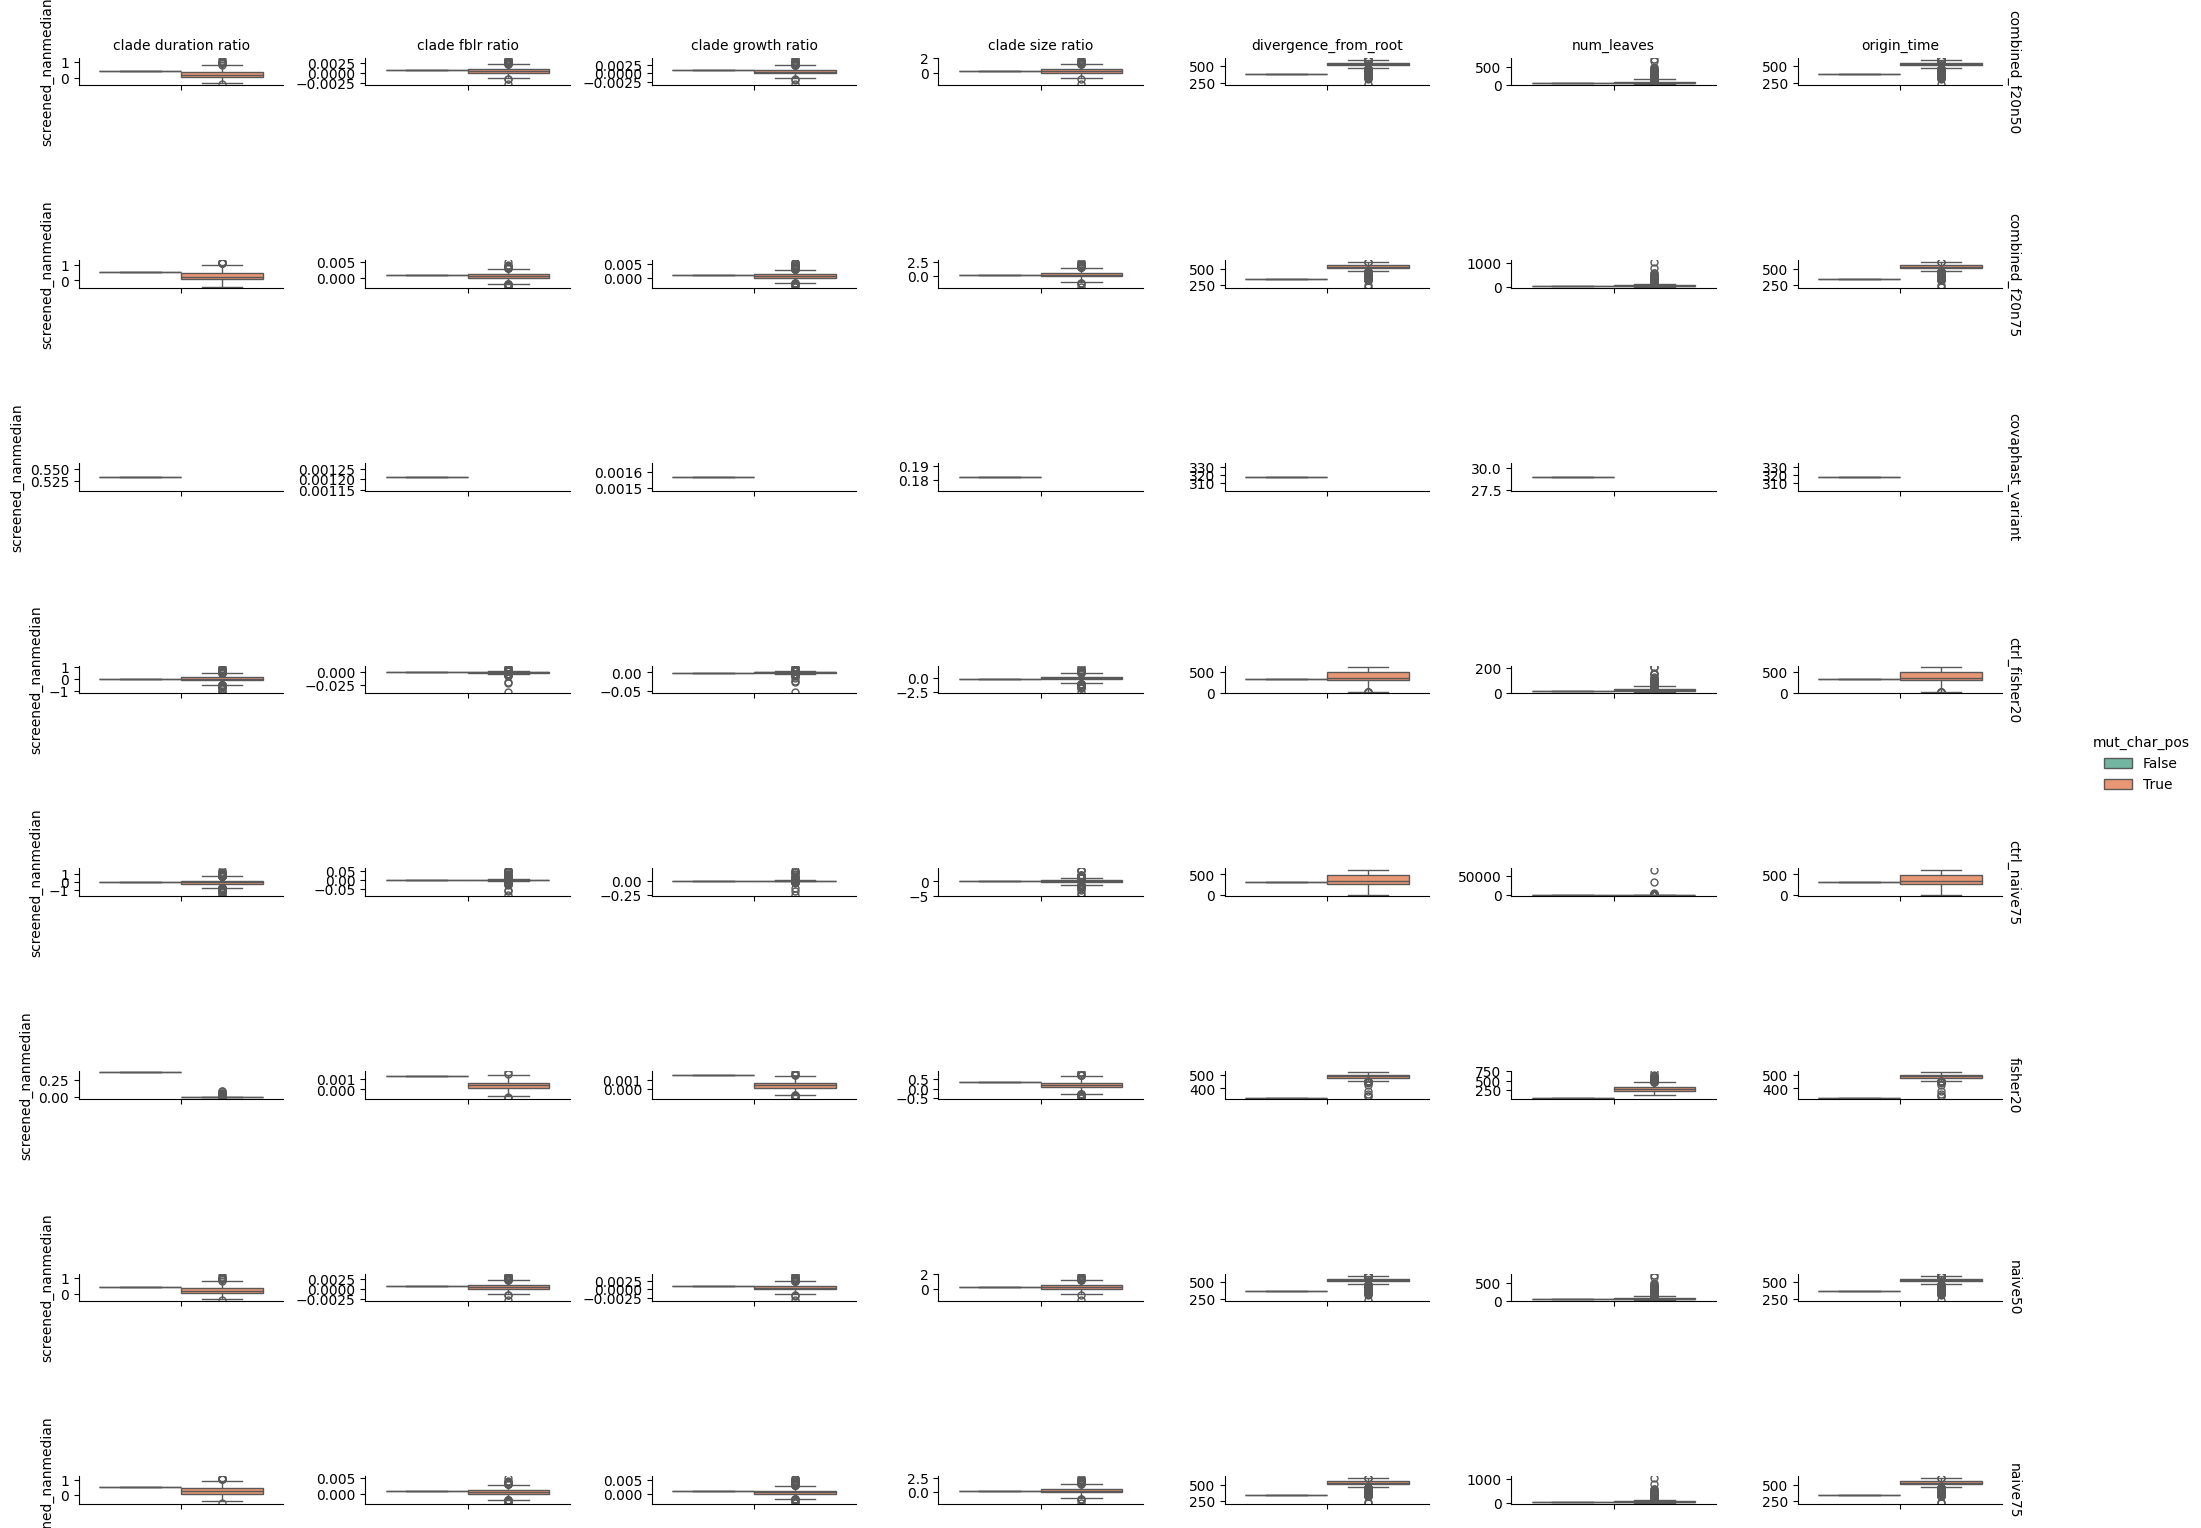

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


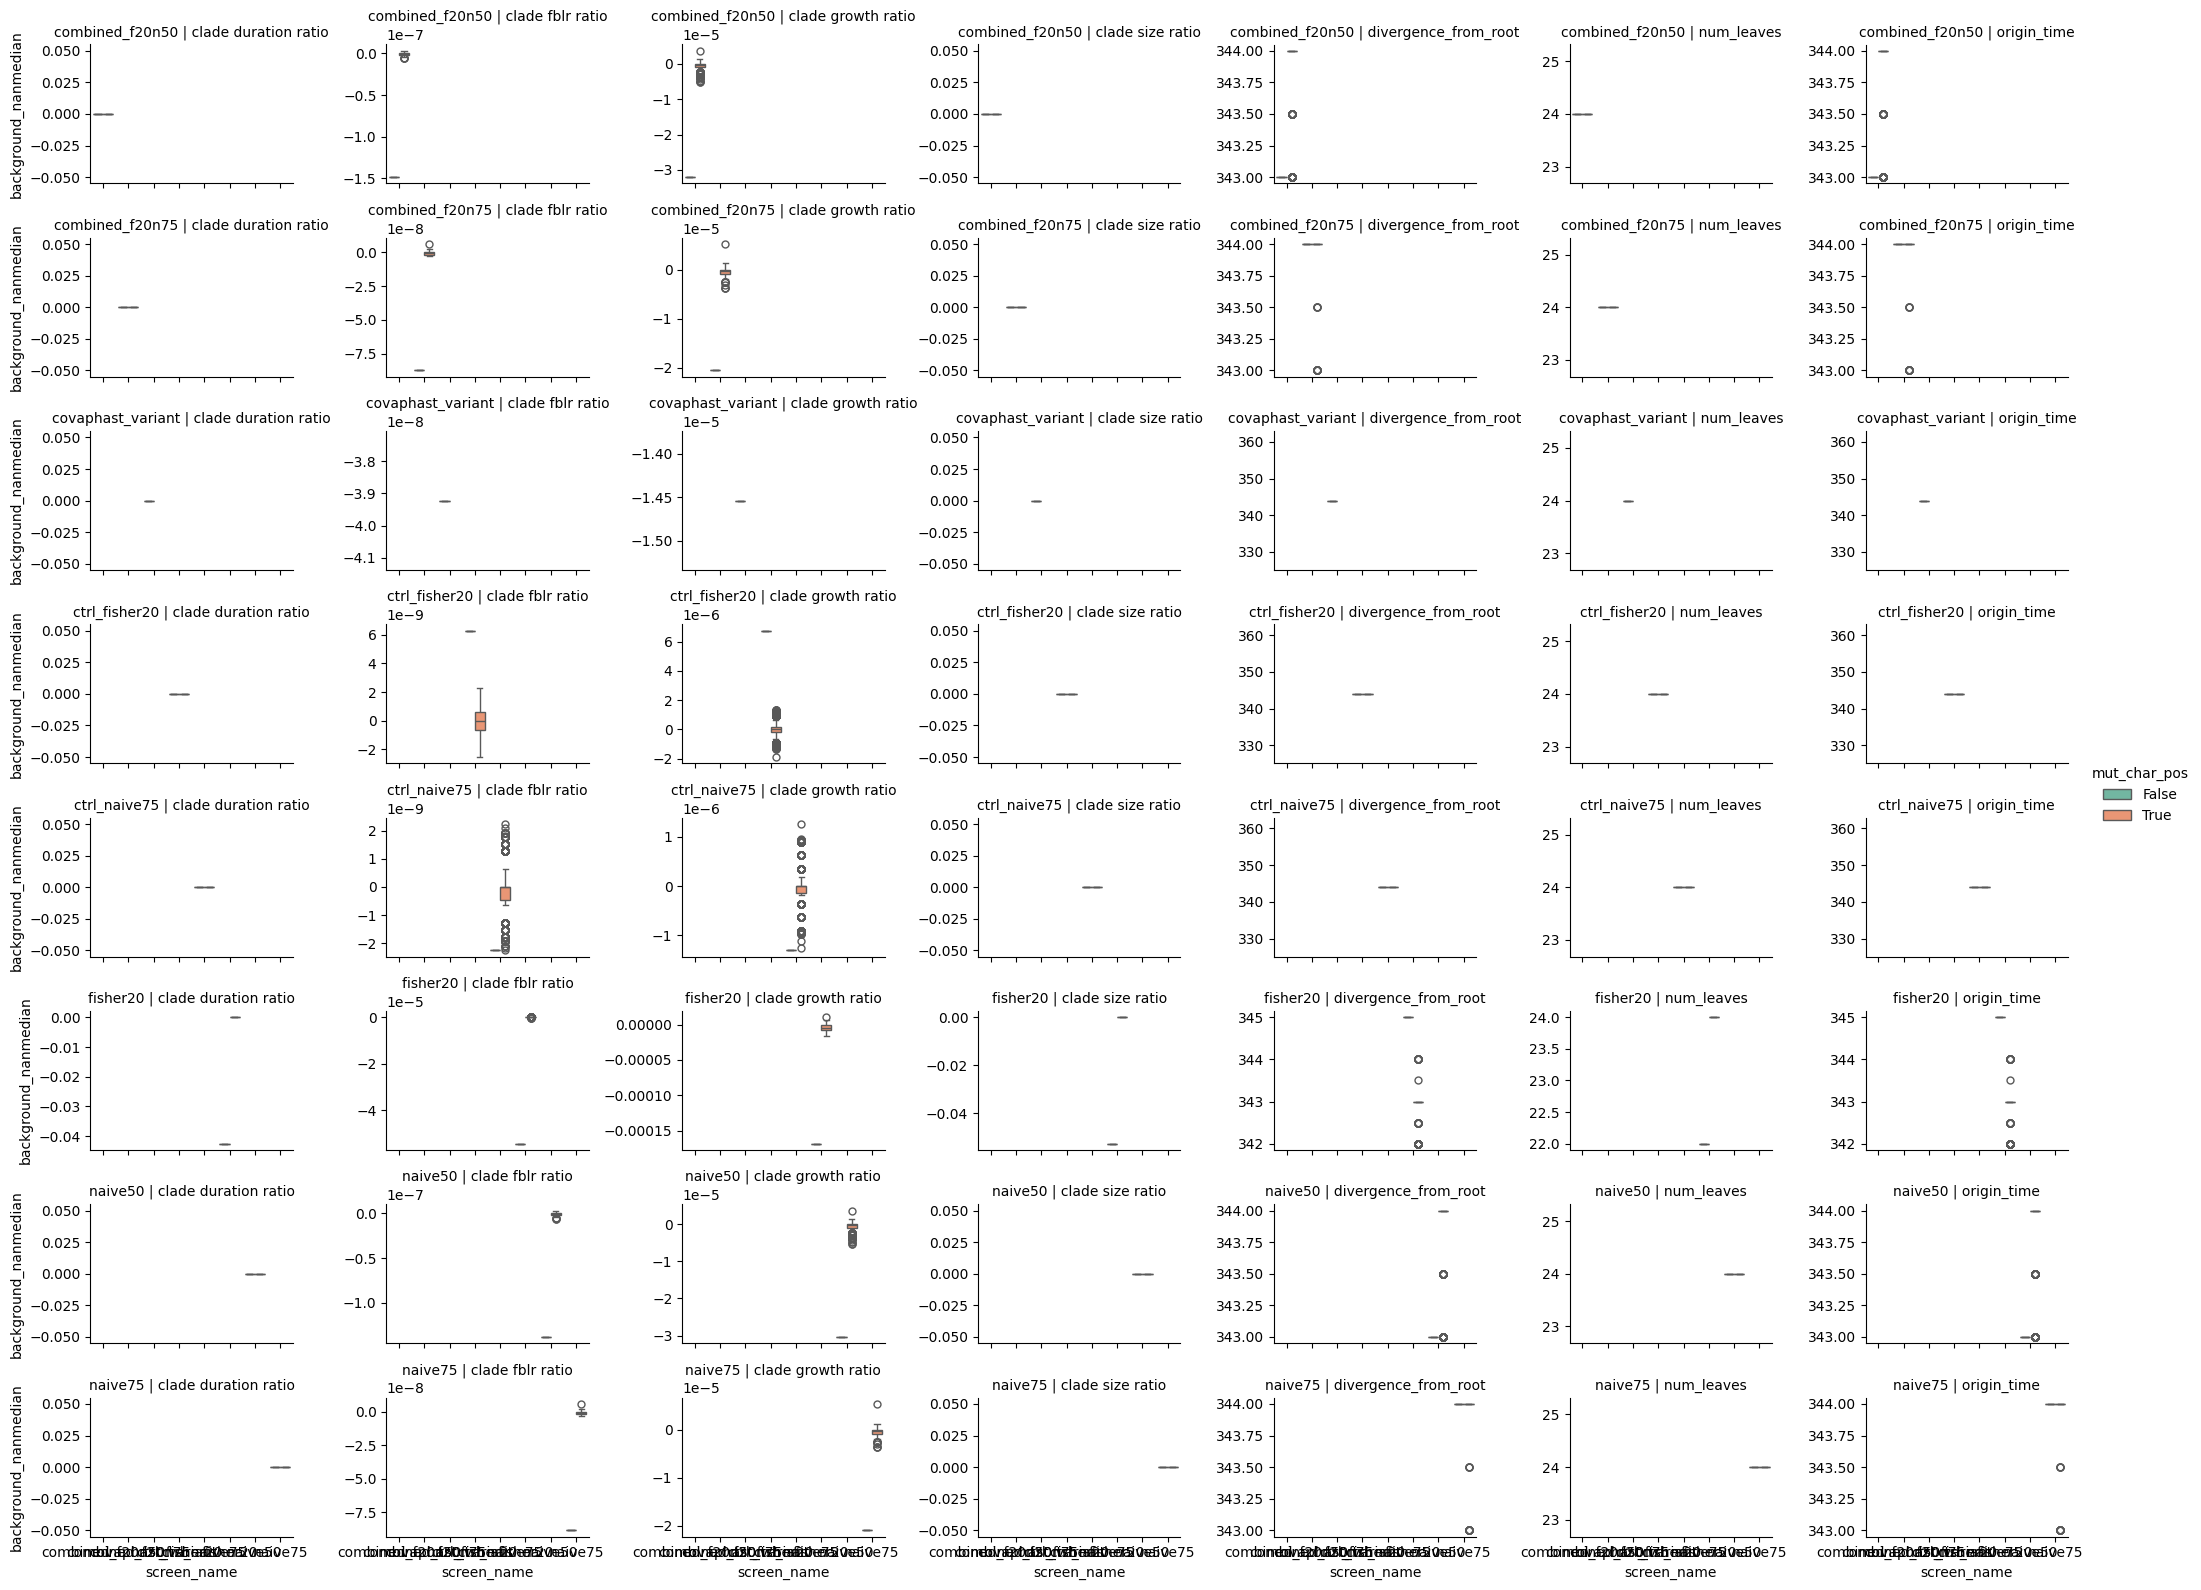

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
